In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
def augmentImages(images, multFactor, nRows=110, nCols=110, chanels=1):
    """
    Applies series of Keras image preprocessing techniques to increase size of training dataset
    Input: An array of images [numImages, nRow, nCols, channels],
        multFactor: multiplactive factor for the image set
        nRows: number of rows in image
        nCol: number of columns in image
        channels: number of image channels

    Output: An array of images [NumImages*multFactor, rRows, nCols, channels]

    """
    gen = ImageDataGenerator()
    newImages = []
    for _ in range(multFactor):
        for image in images:
            transformedImage = gen.apply_transform(image, {'theta':np.random.choice(range(270)),'brightness':np.random.uniform(low=0.001,high=0.99)})
            newImages.append(transformedImage)
    newImages = np.array(newImages)
    return newImages
            

In [3]:
trainImagesFile = './data/volcanoesvenus/Volcanoes_train/train_images.csv'
trainLabelFile = './data/volcanoesvenus/Volcanoes_train/train_labels.csv'
testImagesFile = './data/volcanoesvenus/Volcanoes_test/test_images.csv'
testLabelsFile = './data/volcanoesvenus/Volcanoes_test/test_labels.csv'

In [4]:
# Load images
dfTrainImages = pd.read_csv(trainImagesFile, index_col=False, header=None)
dfTrainLabels = pd.read_csv(trainLabelFile)
dfTestImages = pd.read_csv(testImagesFile, index_col=False, header=None)
dfTestLabels = pd.read_csv(testLabelsFile)

In [5]:
dfTrainImages = dfTrainImages.values
dfTrainLabels = dfTrainLabels.values
dfTestImages = dfTestImages.values
dfTestLabels = dfTestLabels.values

In [6]:
# Keras expects 4D array for model
dfTrainImages = dfTrainImages.reshape(-1, 110, 110, 1)
dfTestImages = dfTestImages.reshape(-1, 110, 110, 1)

In [7]:
# replace the NaN with 0s, makes denoting the classes easier
dfTrainLabels = np.nan_to_num(dfTrainLabels)
dfTestLabels = np.nan_to_num(dfTestLabels)

In [8]:
# get the labels, 1,2, 3, 4. Please see the venus data set documentation.
trainLabels = dfTrainLabels[:, 1]
testLabels = dfTestLabels[:, 1]

zeros = np.where(trainLabels== 0)[0]
ones = np.where(trainLabels == 1)[0]
twos = np.where(trainLabels == 2)[0]
threes = np.where(trainLabels == 3)[0]
fours = np.where(trainLabels == 4)[0]

# Check the training distribution 
zeros.size/700, ones.size/700, twos.size/7000, threes.size/7000, fours.size/7000

(8.571428571428571,
 0.15,
 0.026714285714285715,
 0.049428571428571426,
 0.05171428571428571)

In [9]:
zeros.size, ones.size, twos.size, threes.size, fours.size

(6000, 105, 187, 346, 362)

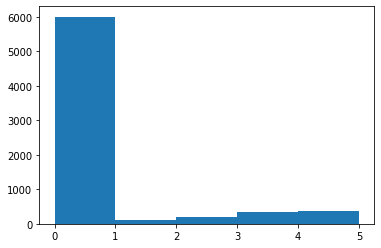

In [10]:
# Visualizing the distribution of classes
plt.hist(dfTrainLabels[:, 1], bins=[0,1,2,3,4,5])
plt.show()

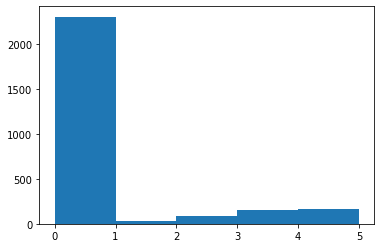

In [11]:
plt.hist(dfTestLabels[:, 1], bins=[0,1,2,3,4,5])
plt.show()

In [12]:
total = len(testLabels)
testZeros = np.where(testLabels == 0)[0]
testOnes = np.where(testLabels == 1)[0]
testTwos = np.where(testLabels == 2)[0]
testThrees = np.where(testLabels == 3)[0]
testFours = np.where(testLabels == 4)[0]

# check test distributions - yup it's horribly skewed
testZeros.size/total, testOnes.size/total, testTwos.size/total, testThrees.size/total, testFours.size/total
#testZeros.size, testOnes.size, testTwos.size, testThrees.size, testFours.size

(0.8412582297000731,
 0.012801755669348939,
 0.03218727139722019,
 0.05413313825896123,
 0.05961960497439649)

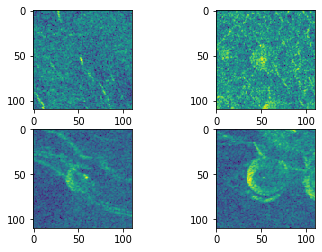

In [13]:
# Let's check out some random volcanoes
for i in range(0, 4):
    img = np.random.choice(len(ones))
    plt.subplot(221 + (i))
    plt.imshow(dfTrainImages[ones[img]].reshape(110, 110))
plt.show()

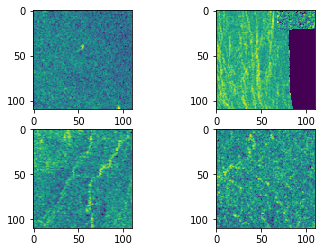

In [14]:
# check out some random NOT volcanoes
for i in range(0,4):
    img = np.random.choice(len(zeros))
    plt.subplot(221 + (i))
    plt.imshow(dfTrainImages[zeros[img]].reshape(110,110))
plt.show()

In [15]:
trainLabels = keras.utils.to_categorical(trainLabels, 5)
testLabels = keras.utils.to_categorical(testLabels, 5)

In [16]:
model = Sequential()
model.add(Conv2D(16, (4,4), activation='relu', input_shape=(110,110,1)))
model.add(Conv2D(32, (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (2,2), activation='relu'))
model.add(Conv2D(128, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5,activation='softmax'))

W0710 20:00:56.058323 139744419583744 deprecation_wrapper.py:119] From /home/longxiajun/MySoftware/anaconda3/envs/CV/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 20:00:56.070850 139744419583744 deprecation_wrapper.py:119] From /home/longxiajun/MySoftware/anaconda3/envs/CV/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 20:00:56.072724 139744419583744 deprecation_wrapper.py:119] From /home/longxiajun/MySoftware/anaconda3/envs/CV/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 20:00:56.089555 139744419583744 deprecation_wrapper.py:119] From /home/longxiajun/MySoftware/anaconda3/envs/CV/lib/python3.6/site-packages/keras/backend/tensorflow_backend.p

In [17]:
model.compile(optimizer=keras.optimizers.SGD(1e-3),
             loss='categorical_crossentropy',metrics=['accuracy'])

W0710 20:00:56.150345 139744419583744 deprecation_wrapper.py:119] From /home/longxiajun/MySoftware/anaconda3/envs/CV/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0710 20:00:56.154968 139744419583744 deprecation_wrapper.py:119] From /home/longxiajun/MySoftware/anaconda3/envs/CV/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [18]:
# Next we need to augment the images, so split them out into types. This is to get approximately equal numbers 
# of each class
noVolcanoes = dfTrainImages[zeros]
volcanoes = dfTrainImages[ones]
volcanoes2 = dfTrainImages[twos]
volcanoes3 = dfTrainImages[threes]
volcanoes4 = dfTrainImages[fours]

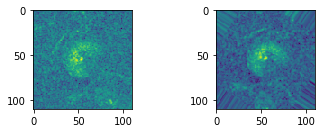

In [19]:
newImage = augmentImages([volcanoes[0]], multFactor=1)
plt.subplot(221)
plt.imshow(volcanoes[0].reshape(110,110))
plt.subplot(222)
plt.imshow(newImage.reshape(110,110))
plt.show()

In [20]:
augmentedVolcanoes =  augmentImages(volcanoes,  multFactor=50)
augmentedVolcanoes2 = augmentImages(volcanoes2, multFactor=35)
augmentedVolcanoes3 = augmentImages(volcanoes3, multFactor=15)
augmentedVolcanoes4 = augmentImages(volcanoes4, multFactor=15)

In [21]:

# now we have to reassemble the dataset and construct the new labels
x_train = np.vstack([noVolcanoes, augmentedVolcanoes, augmentedVolcanoes2, augmentedVolcanoes3, augmentedVolcanoes4])

noVolcanoesLabels = np.zeros(noVolcanoes.shape[0])
augmentedVolcanoesLabels = np.ones(augmentedVolcanoes.shape[0])
augmentedVolcanoes2Labels = 2*np.ones(augmentedVolcanoes2.shape[0])
augmentedVolcanoes3Labels = 3*np.ones(augmentedVolcanoes3.shape[0])
augmentedVolcanoes4Labels = 4*np.ones(augmentedVolcanoes4.shape[0])

y_train = np.hstack([noVolcanoesLabels, augmentedVolcanoesLabels, augmentedVolcanoes2Labels, 
                     augmentedVolcanoes3Labels, augmentedVolcanoes4Labels])

In [22]:
x_train, y_train = shuffle(x_train, y_train)

In [23]:
y_train = keras.utils.to_categorical(y_train, 5)

In [24]:
model.fit(x_train,y_train,batch_size=64, verbose=1, epochs=50)

W0710 20:01:16.328551 139744419583744 deprecation.py:323] From /home/longxiajun/MySoftware/anaconda3/envs/CV/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
28415/28415 [==============================] - 18s 626us/step - loss: 2.6714 - acc: 0.2295
Epoch 2/50
28415/28415 [==============================] - 15s 525us/step - loss: 1.6056 - acc: 0.2340
Epoch 3/50
28415/28415 [==============================] - 15s 527us/step - loss: 1.6041 - acc: 0.2338
Epoch 4/50
28415/28415 [==============================] - 15s 529us/step - loss: 1.6040 - acc: 0.2362
Epoch 5/50
28415/28415 [==============================] - 15s 536us/step - loss: 1.6026 - acc: 0.2351
Epoch 6/50
28415/28415 [==============================] - 16s 551us/step - loss: 1.6037 - acc: 0.2359
Epoch 7/50
28415/28415 [==============================] - 16s 549us/step - loss: 1.6087 - acc: 0.2360
Epoch 8/50
28415/28415 [==============================] - 16s 547us/step - loss: 1.6058 - acc: 0.2354
Epoch 9/50
28415/28415 [==============================] - 15s 545us/step - loss: 1.6005 - acc: 0.2360
Epoch 10/50
28415/28415 [==============================] - 16s 573us/step - loss: 

In [25]:
score = model.evaluate(dfTestImages, testLabels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.5115972700656202
Test accuracy 0.8463789320114152


In [27]:
predictions = model.predict(dfTestImages)
classes = np.array([np.argmax(row) for row in predictions], dtype=np.float16)

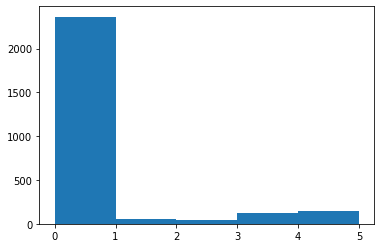

In [28]:
plt.hist(classes, bins=[0,1,2,3,4,5])
plt.show()

In [29]:
possibleVolcanoes = np.where(classes == 1)[0]

In [30]:
print(dfTestLabels[:20,1])
print(classes[:20])

[0. 0. 1. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
model.fit(x_train, y_train, batch_size=64, verbose=1, epochs=15)

Epoch 1/15
28415/28415 [==============================] - 15s 512us/step - loss: 0.7074 - acc: 0.7288
Epoch 2/15
28415/28415 [==============================] - 15s 514us/step - loss: 0.6090 - acc: 0.7666
Epoch 3/15
28415/28415 [==============================] - 15s 516us/step - loss: 0.5501 - acc: 0.7904
Epoch 4/15
28415/28415 [==============================] - 15s 519us/step - loss: 0.5204 - acc: 0.8011
Epoch 5/15
28415/28415 [==============================] - 15s 518us/step - loss: 0.9426 - acc: 0.6305
Epoch 6/15
28415/28415 [==============================] - 15s 525us/step - loss: 0.6961 - acc: 0.7298
Epoch 7/15
28415/28415 [==============================] - 15s 534us/step - loss: 0.5801 - acc: 0.7829
Epoch 8/15
28415/28415 [==============================] - 15s 531us/step - loss: 0.5247 - acc: 0.8024
Epoch 9/15
28415/28415 [==============================] - 16s 546us/step - loss: 0.5245 - acc: 0.8111
Epoch 10/15
28415/28415 [==============================] - 15s 543us/step - loss: 

In [32]:
score = model.evaluate(dfTestImages, testLabels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.8870463006759789
Test accuracy 0.8365032919236318
